In [526]:
import pandas as pd
import numpy as np
from nltk import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
# colors = sns.color_palette('pastel')

In [533]:
data = pd.read_csv('data.csv')
data.head(3)

,Description,Belts,Personal Injury,Property Damage,Commercial License,Commercial Vehicle,State,VehicleType,Year,Make,Model,Color,Contributed To Accident,Driver Race,Gender,Driver City,Drive State,Violation Type
0,'DISPLAYING EXPIRED REGISTRATION PLATE ISSUED ...,No,No,No,No,No,NC,'02 - Automobile',2013,HYUNDAI,SONATA,GRAY,No,WHITE,F,ASHEVILLE,NC,Citation
1,'DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEF...,No,No,No,No,No,MD,'02 - Automobile',2015,FORD,FUSION,SILVER,No,OTHER,M,'SILVER SPRING',MD,Citation
2,'DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE',No,No,No,No,No,MD,'02 - Automobile',2000,TOYOTA,CAMRY,BLACK,No,BLACK,M,'SILVER SPRING',MD,Citation


In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70340 entries, 0 to 70339
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Description              70340 non-null  object
 1   Belts                    70340 non-null  object
 2   Personal Injury          70340 non-null  object
 3   Property Damage          70340 non-null  object
 4   Commercial License       70340 non-null  object
 5   Commercial Vehicle       70340 non-null  object
 6   State                    70340 non-null  object
 7   VehicleType              70340 non-null  object
 8   Year                     70340 non-null  object
 9   Make                     70340 non-null  object
 10  Model                    70340 non-null  object
 11  Color                    70340 non-null  object
 12  Contributed To Accident  70340 non-null  object
 13  Driver Race              70340 non-null  object
 14  Gender                   70340 non-nul

In [319]:
desc_gp = data.groupby('Violation Type').agg({'Description':lambda x:' '.join(x.values.astype(str))})
desc_gp.head()

,Description
Violation Type,
Citation,'DISPLAYING EXPIRED REGISTRATION PLATE ISSUED ...
SERO,'STOP LIGHTS' Headlights 'STOP LIGHTS' 'Wheels...
Warning,'FAILURE OF MV OPER TO PRESENT EVIDENCE OF REQ...


In [350]:
def get_counts(n, text):
    text = text.replace('\'', '')
    tokens = word_tokenize(text)
    text = Text(tokens)
    counts = {}
    
    for i in range(1, n+1):
        counts[i] = FreqDist(ngrams(text, i))
        
    return counts

In [353]:
cit_c = get_counts(4, desc_gp.loc['Citation'].values[0])
sero_c = get_counts(4, desc_gp.loc['SERO'].values[0])
war_c = get_counts(4, desc_gp.loc['Warning'].values[0])

In [370]:
cit_c[2].most_common(5)

[(('ON', 'HIGHWAY'), 7897),
 (('FAILURE', 'TO'), 6171),
 (('VEHICLE', 'ON'), 5997),
 (('MOTOR', 'VEHICLE'), 5454),
 (('MPH', 'IN'), 4654)]

In [372]:
cit_c[4].most_common(10)

[(('MPH', 'IN', 'A', 'POSTED'), 4644),
 (('MOTOR', 'VEHICLE', 'ON', 'HIGHWAY'), 3935),
 (('PERSON', 'DRIVING', 'MOTOR', 'VEHICLE'), 3007),
 (('DRIVING', 'MOTOR', 'VEHICLE', 'ON'), 2880),
 (('VEHICLE', 'ON', 'HIGHWAY', 'WITHOUT'), 2096),
 (('PUBLIC', 'USE', 'PROPERTY', 'ON'), 1994),
 (('VEHICLE', 'ON', 'HIGHWAY', 'OR'), 1975),
 (('ON', 'HIGHWAY', 'OR', 'PUBLIC'), 1975),
 (('HIGHWAY', 'OR', 'PUBLIC', 'USE'), 1975),
 (('OR', 'PUBLIC', 'USE', 'PROPERTY'), 1975)]

In [369]:
 sero_c[2].most_common(5)

[(('STOP', 'LIGHTS'), 991),
 (('Stop', 'Lights'), 406),
 (('LIGHTS', 'STOP'), 340),
 (('WINDOW', 'TINT'), 314),
 (('TAG', 'LIGHTS'), 206)]

In [359]:
 sero_c[4].most_common(5)

[(('STOP', 'LIGHTS', 'STOP', 'LIGHTS'), 277),
 (('STOP', 'LIGHTS', 'Stop', 'Lights'), 129),
 (('Stop', 'Lights', 'STOP', 'LIGHTS'), 110),
 (('LIGHTS', 'STOP', 'LIGHTS', 'STOP'), 98),
 (('WINDOW', 'TINT', 'STOP', 'LIGHTS'), 92)]

In [368]:
 war_c[2].most_common(5)

[(('FAILURE', 'TO'), 12498),
 (('DRIVER', 'FAILURE'), 6194),
 (('TO', 'DISPLAY'), 4713),
 (('SPEED', 'LIMIT'), 4415),
 (('LIMIT', 'OF'), 4306)]

In [371]:
 war_c[4].most_common(10)

[(('EXCEEDING', 'THE', 'POSTED', 'SPEED'), 4294),
 (('THE', 'POSTED', 'SPEED', 'LIMIT'), 4294),
 (('POSTED', 'SPEED', 'LIMIT', 'OF'), 4294),
 (('DRIVER', 'FAILURE', 'TO', 'OBEY'), 4191),
 (('FAILURE', 'TO', 'OBEY', 'PROPERLY'), 3999),
 (('TO', 'OBEY', 'PROPERLY', 'PLACED'), 3999),
 (('OBEY', 'PROPERLY', 'PLACED', 'TRAFFIC'), 3999),
 (('PROPERLY', 'PLACED', 'TRAFFIC', 'CONTROL'), 3999),
 (('PLACED', 'TRAFFIC', 'CONTROL', 'DEVICE'), 3999),
 (('TRAFFIC', 'CONTROL', 'DEVICE', 'INSTRUCTIONS'), 3999)]

In [492]:
X_train_counts = count_vect.fit_transform(data['Description'])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, data['Violation Type'])

In [545]:
mp = {
    'Citation': 0,
    'SERO': 1,
    'Warning': 2,
}

In [546]:
data['desc_eng'] = data['Description'].apply(lambda x: mp[clf.predict(count_vect.transform([x]))[0]])

### Exploratory Data Analysis

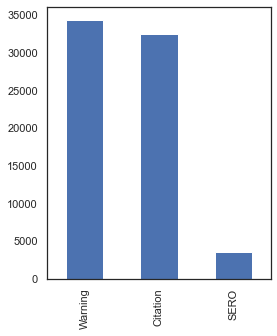

In [276]:
plt.figure(figsize=(4, 5))
_ = data['Violation Type'].value_counts().plot.bar()

In [18]:
data['Driver City'].value_counts()

'SILVER SPRING'    17691
GAITHERSBURG        7224
GERMANTOWN          5838
ROCKVILLE           5804
WASHINGTON          2133
                   ...  
SPRING                 1
'W HYATTSVILLE'        1
'SN LUIS OBISP'        1
GRUNDY                 1
MEQUON                 1
Name: Driver City, Length: 1890, dtype: int64

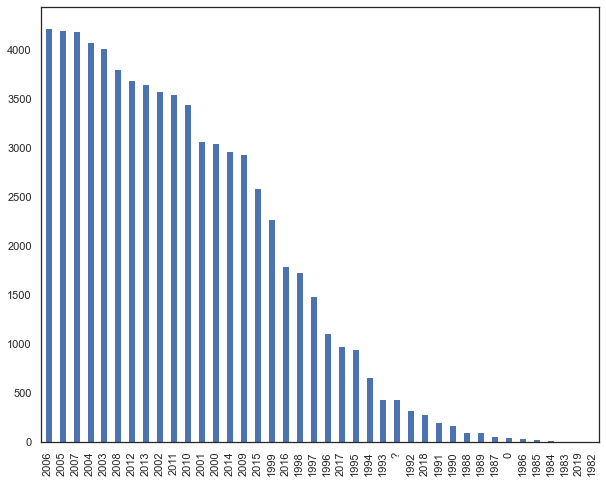

In [35]:
_ = data['Year'].value_counts().head(40).plot.bar()

In [15]:
data['Model'].value_counts()

4S               7780
TK               4604
ACCORD           2696
CIVIC            2392
CAMRY            2375
                 ... 
'GRAN MARQ'         1
'MILLENIA 4S'       1
'SLK 230'           1
LS450               1
CONVERT             1
Name: Model, Length: 3828, dtype: int64

#### Data Preprocessing

In [547]:
df = data.copy()
ordinal_enc = OrdinalEncoder()

cols = ['Description', 'Belts', 'Personal Injury', 'Property Damage',
       'Commercial License', 'Commercial Vehicle', 'State', 'VehicleType',
       'Year', 'Make', 'Model', 'Color', 'Contributed To Accident',
       'Driver Race', 'Gender', 'Driver City', 'Drive State', 'Violation Type']

df[cols] = ordinal_enc.fit_transform(data[cols])

In [496]:
df.head()

,Description,Belts,Personal Injury,Property Damage,Commercial License,Commercial Vehicle,State,VehicleType,Year,Make,Model,Color,Contributed To Accident,Driver Race,Gender,Driver City,Drive State,Violation Type,desc_eng
0,90.0,0.0,0.0,0.0,0.0,0.0,29.0,1.0,64.0,361.0,3440.0,15.0,0.0,5.0,0.0,703.0,30.0,0.0,2
1,150.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,66.0,248.0,2671.0,23.0,0.0,4.0,1.0,525.0,23.0,0.0,2
2,373.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,51.0,786.0,2194.0,6.0,0.0,2.0,1.0,525.0,23.0,0.0,1
3,1799.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,63.0,315.0,2404.0,6.0,0.0,2.0,1.0,920.0,23.0,0.0,1
4,90.0,0.0,0.0,0.0,1.0,0.0,22.0,1.0,61.0,248.0,2618.0,6.0,0.0,5.0,1.0,319.0,23.0,0.0,2


### Visualizations

Text(-7.273118402777776, 0.5, 'Count')

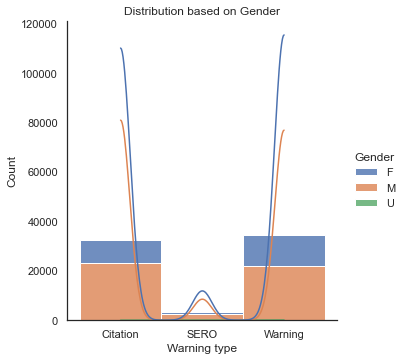

In [105]:
_ = sns.displot(
    x = 'Violation Type', 
    hue = 'Gender', 
    kde = True, 
    data = data, 
    multiple = 'stack',
    alpha = 0.8,
)
plt.title('Distribution based on Gender')
plt.xlabel('Warning type')
plt.ylabel('Count')

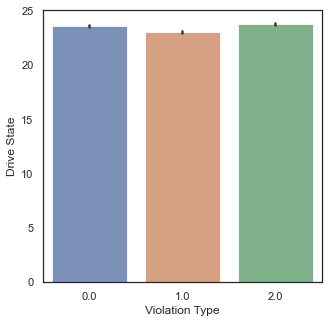

In [282]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    y = 'Drive State', 
    x = 'Violation Type', 
    data = df, 
    alpha = 0.8,
)

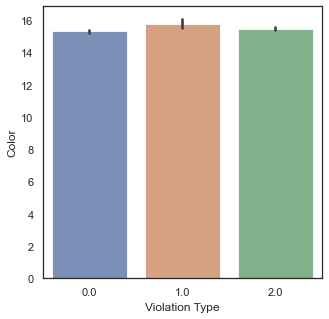

In [283]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    y = 'Color', 
    x = 'Violation Type', 
    data = df, 
    alpha = 0.8,
)

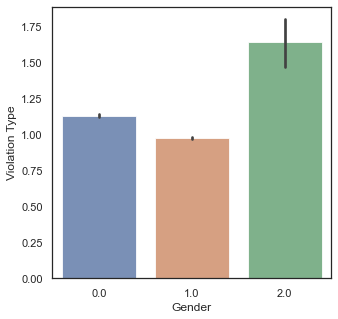

In [284]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    x = 'Gender', 
    y = 'Violation Type', 
    data = df, 
    alpha = 0.8,
)

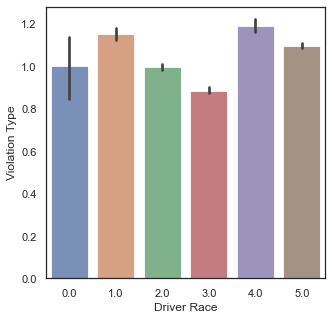

In [285]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    x = 'Driver Race', 
    y = 'Violation Type', 
    data = df, 
    alpha = 0.8,
)

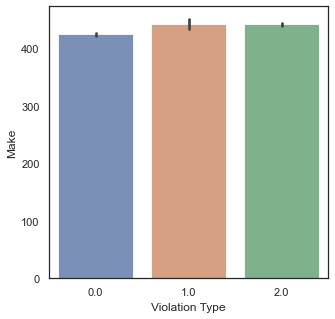

In [286]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    y = 'Make', 
    x = 'Violation Type', 
    data = df, 
    alpha = 0.8,
)

Text(1.7915170138888925, 0.5, 'Count')

<Figure size 360x360 with 0 Axes>

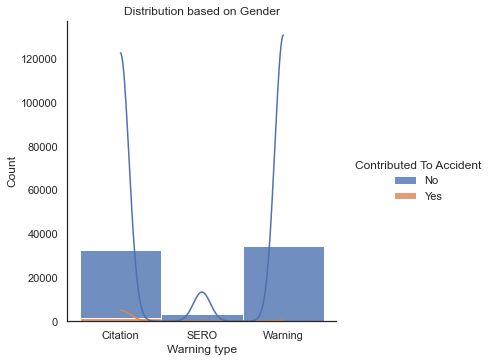

In [287]:
plt.figure(figsize=(5, 5))
_ = sns.displot(
    x = 'Violation Type', 
    hue = 'Contributed To Accident', 
    kde = True, 
    data = data, 
    multiple = 'stack',
    alpha = 0.8,
)
plt.title('Distribution based on Gender')
plt.xlabel('Warning type')
plt.ylabel('Count')

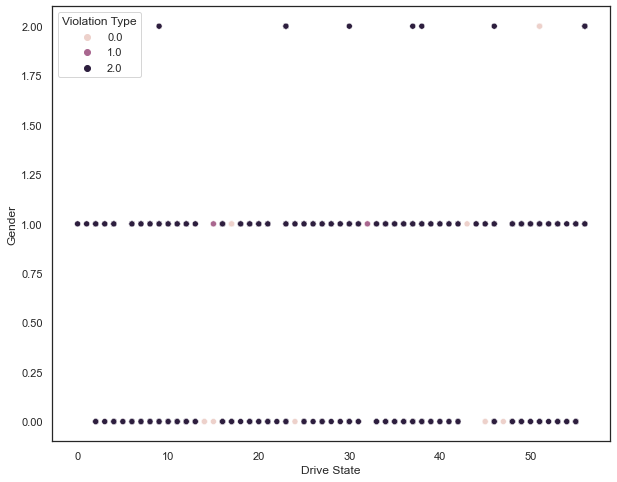

In [289]:
_ = sns.scatterplot(
    x = 'Drive State', 
    y = 'Gender',
    hue = 'Violation Type',
    data = df,
)

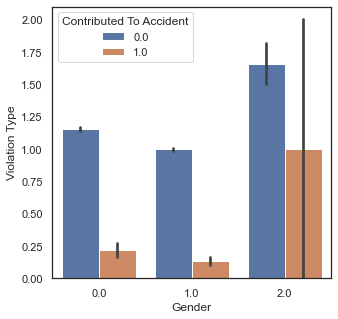

In [290]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    x = 'Gender', 
    y = 'Violation Type',
    hue = 'Contributed To Accident',
    data = df,
)

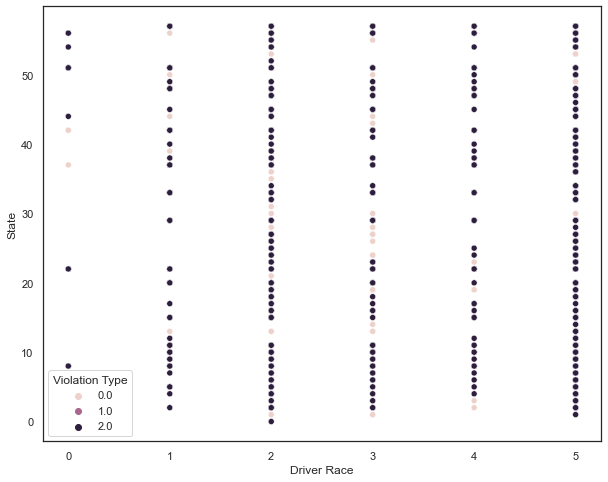

In [143]:
_ = sns.scatterplot(
    y = 'State', 
    x = 'Driver Race',
    hue = 'Violation Type',
    data = df,
)

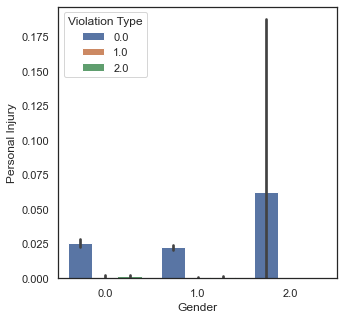

In [291]:
plt.figure(figsize=(5, 5))
_ = sns.barplot(
    hue = 'Violation Type', 
    y = 'Personal Injury',
    x = 'Gender',
    data = df,
)

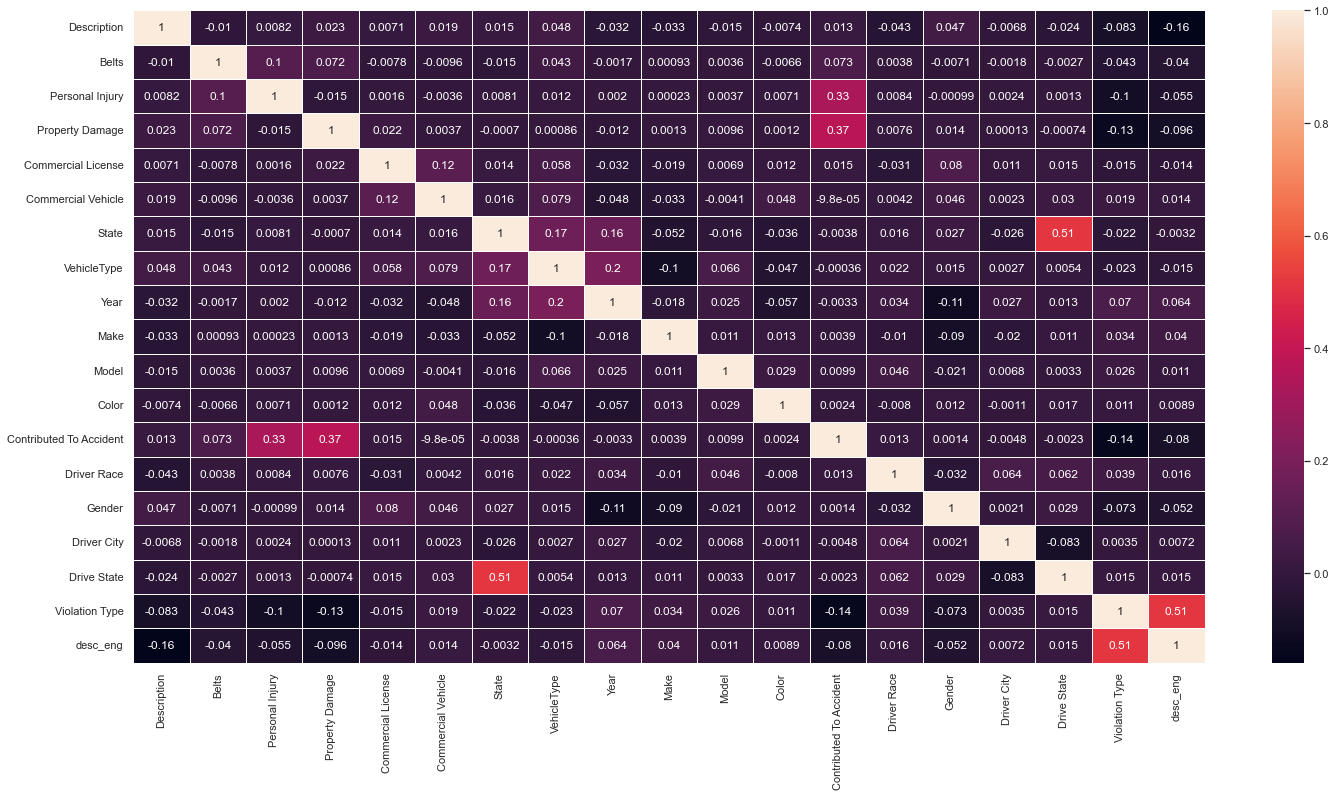

In [551]:
plt.figure(figsize = (24, 12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [552]:
df.corr()['Violation Type'].sort_values()

Contributed To Accident   -0.139049
Property Damage           -0.125448
Personal Injury           -0.101189
Description               -0.082798
Gender                    -0.072796
Belts                     -0.042997
VehicleType               -0.023455
State                     -0.021977
Commercial License        -0.015411
Driver City                0.003515
Color                      0.010616
Drive State                0.014618
Commercial Vehicle         0.018542
Model                      0.025527
Make                       0.033530
Driver Race                0.039167
Year                       0.070488
desc_eng                   0.513939
Violation Type             1.000000
Name: Violation Type, dtype: float64

### Modelling

In [553]:
target_col = 'Violation Type'
target = df[target_col]
select_cols = [
    'Contributed To Accident',
    'Description',
    # 'Gender',
    'Property Damage',
    'Personal Injury',
    'desc_eng',
]
X_train, x_test, y_train, y_test = train_test_split(df[select_cols], target, train_size=0.70)

#### Random Forest Classifier

In [554]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_train, y_train)
forest_y = forest.predict(x_test)

test_score = forest.score(x_test, y_test)
print(f"Accuracy of the RandomForestClassifier: {test_score:.2f}")

Accuracy of the RandomForestClassifier: 0.79


In [555]:
cv_results = cross_validate(forest, df[select_cols], target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score via cross-validation:
0.793 +/- 0.003


In [556]:
print(classification_report(y_test, forest_y, target_names=['Citation', 'SERO', 'Warning']))

              precision    recall  f1-score   support

    Citation       0.87      0.65      0.74      9752
        SERO       0.99      1.00      1.00      1038
     Warning       0.73      0.91      0.81     10312

    accuracy                           0.79     21102
   macro avg       0.86      0.85      0.85     21102
weighted avg       0.81      0.79      0.79     21102



#### KNN

In [558]:
knn = KNeighborsClassifier(300)
knn.fit(X_train, y_train)

knn_y = knn.predict(x_test)

test_score = knn.score(x_test, y_test)
print(f"Accuracy of the KNN: {test_score:.2f}")

Accuracy of the KNN: 0.76


In [560]:
cv_results = cross_validate(knn, df[select_cols], target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score via cross-validation:
0.655 +/- 0.003


In [559]:
print(classification_report(y_test, knn_y, target_names=['Citation', 'SERO', 'Warning']))

              precision    recall  f1-score   support

    Citation       0.82      0.63      0.71      9752
        SERO       0.85      0.91      0.88      1038
     Warning       0.71      0.87      0.78     10312

    accuracy                           0.76     21102
   macro avg       0.79      0.80      0.79     21102
weighted avg       0.77      0.76      0.75     21102



#### SVM

In [561]:
svm = SVC()
svm.fit(X_train, y_train)
svm_y = knn.predict(x_test)

In [562]:
cv_results = cross_validate(svm, df[select_cols], target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score via cross-validation:
0.634 +/- 0.002


In [563]:
print(classification_report(y_test, svm_y, target_names=['Citation', 'SERO', 'Warning']))

              precision    recall  f1-score   support

    Citation       0.82      0.63      0.71      9752
        SERO       0.85      0.91      0.88      1038
     Warning       0.71      0.87      0.78     10312

    accuracy                           0.76     21102
   macro avg       0.79      0.80      0.79     21102
weighted avg       0.77      0.76      0.75     21102

